In [57]:
import numpy as np
import mne
from mne.preprocessing import ICA
from sklearn import decomposition
from matplotlib import pyplot as plt
import os

In [45]:
train_autokl = np.load('../cache/thingseeg2_preproc/extracted_embeddings/train_autokl.npy', mmap_mode='r')
train_cliptext = np.load('../cache/thingseeg2_preproc/extracted_embeddings/train_cliptext.npy', mmap_mode='r')
# train_clipvision = np.load('../cache/thingseeg2_preproc/extracted_embeddings/train_clipvision.npy', mmap_mode='r')
test_autokl = np.load('../cache/thingseeg2_preproc/extracted_embeddings/test_autokl.npy', mmap_mode='r')
test_cliptext = np.load('../cache/thingseeg2_preproc/extracted_embeddings/test_cliptext.npy', mmap_mode='r')
test_clipvision = np.load('../cache/thingseeg2_preproc/extracted_embeddings/test_clipvision.npy', mmap_mode='r')
# print(train_autokl.shape, train_cliptext.shape, train_clipvision.shape)
print(test_autokl.shape, test_cliptext.shape, test_clipvision.shape)
# train_autokl = train_autokl[..., np.newaxis]
# test_autokl = test_autokl[..., np.newaxis]
# train_autokl = train_autokl.T
# test_autokl = test_autokl.T
# train_cliptext = train_cliptext[:,0]
test_cliptext = test_cliptext[:,0:].transpose((1, 0, 2)).reshape(test_cliptext.shape[1], -1).T
# train_clipvision = train_clipvision[:,0]
test_clipvision = test_clipvision[:,0:].transpose((1, 0, 2)).reshape(test_clipvision.shape[1], -1).T
# train_cliptext = train_cliptext.reshape(train_cliptext.shape[0], -1).T
# train_cliptext = train_cliptext[..., np.newaxis]
# test_cliptext = test_cliptext.reshape(test_cliptext.shape[0], -1).T
# test_cliptext = test_cliptext[..., np.newaxis]
# train_clipvision = train_clipvision.reshape(train_clipvision.shape[0], -1).T
# train_clipvision = train_clipvision[..., np.newaxis]
# test_clipvision = test_clipvision.reshape(test_clipvision.shape[0], -1).T
# test_clipvision = test_clipvision[..., np.newaxis]
# print(train_autokl.shape, train_cliptext.shape, train_clipvision.shape)
print(test_autokl.shape, test_cliptext.shape, test_clipvision.shape)

(200, 91168) (200, 77, 768) (200, 257, 768)
(200, 91168) (153600, 77) (153600, 257)


In [46]:
n_components = 50
# ica_estimator = decomposition.FastICA(
#     n_components=n_components, max_iter=400, whiten="arbitrary-variance", tol=15e-5
# )
ica_estimator = decomposition.FastICA(
    n_components=n_components, whiten="arbitrary-variance"
)
pca_estimator = decomposition.PCA(
    n_components=n_components, svd_solver="randomized", whiten=True
)


In [ ]:
ica_estimator.fit(test_clipvision)

In [47]:
pca_estimator.fit(test_clipvision)

PCA(n_components=50, svd_solver='randomized', whiten=True)

In [13]:
spca_estimator = decomposition.SparsePCA(
    n_components=n_components, alpha=0.1, ridge_alpha=0.01, max_iter=100
)
spca_estimator.fit(test_clipvision)

SparsePCA(alpha=0.1, max_iter=100, n_components=730)

In [48]:
# S_ica = ica_estimator.transform(test_clipvision)  # Get the independent components
S_pca = pca_estimator.transform(test_clipvision)  # Get the independent components
# S_spca = spca_estimator.transform(train_clipvision)  # Get the independent components

In [52]:
pca50_clipvision = pca_estimator.inverse_transform(S_pca)

In [56]:
pca50_clipvision.T.reshape((257, 200, 768)).transpose(1,0,2).shape

(200, 257, 768)

In [58]:
dir = '../cache/thingseeg2_synthetic/pca_embeddings'
if not os.path.exists(dir):
   os.makedirs(dir)
np.save(f'{dir}/pca50_clipvision', pca50_clipvision.T.reshape((257, 200, 768)).transpose(1,0,2))

In [59]:
n_components = 50
# ica_estimator = decomposition.FastICA(
#     n_components=n_components, max_iter=400, whiten="arbitrary-variance", tol=15e-5
# )
ica_estimator = decomposition.FastICA(
    n_components=n_components, whiten="arbitrary-variance"
)
pca_estimator = decomposition.PCA(
    n_components=n_components, svd_solver="randomized", whiten=True
)
pca_estimator.fit(test_cliptext)
S_pca = pca_estimator.transform(test_cliptext)  # Get the independent components
pca50_cliptext = pca_estimator.inverse_transform(S_pca)
dir = '../cache/thingseeg2_synthetic/pca_embeddings'
if not os.path.exists(dir):
   os.makedirs(dir)
np.save(f'{dir}/pca50_cliptext', pca50_cliptext.T.reshape((77, 200, 768)).transpose(1,0,2))

In [61]:
test_caps = np.load('../data/things-eeg2_preproc/test_concepts.npy', mmap_mode='r')  

In [62]:
test_caps

memmap(['aircraft carrier', 'antelope', 'backscratcher', 'balance beam',
        'banana', 'baseball bat', 'basil', 'basketball', 'bassoon',
        'baton4', 'batter', 'beaver', 'bench', 'bike', 'birthday cake',
        'blowtorch', 'boat', 'bok choy', 'bonnet', 'bottle opener',
        'brace', 'bread', 'breadbox', 'bug', 'buggy', 'bullet', 'bun',
        'bush', 'calamari', 'candlestick', 'cart', 'cashew', 'cat',
        'caterpillar', 'cd player', 'chain', 'chaps', 'cheese', 'cheetah',
        'chest2', 'chime', 'chopsticks', 'cleat', 'cleaver', 'coat',
        'cobra', 'coconut', 'coffee bean', 'coffeemaker', 'cookie',
        'cordon bleu', 'coverall', 'crab', 'creme brulee', 'crepe',
        'crib', 'croissant', 'crow', 'cruise ship', 'crumb', 'cupcake',
        'dagger', 'dalmatian', 'dessert', 'dragonfly', 'dreidel', 'drum',
        'duffel bag', 'eagle', 'eel', 'egg', 'elephant', 'espresso',
        'face mask', 'ferry', 'flamingo', 'folder', 'fork', 'freezer',
        'frenc

In [49]:
import numpy as np
from scipy.stats import kurtosis
# from sklearn.decomposition import FastICA

# # Generate sample data
# n_samples = 2000
# time = np.linspace(0, 8, n_samples)

# s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
# s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
# s3 = np.sign(np.sin(4 * time))  # Signal 3: saw tooth signal

# S = np.c_[s1, s2, s3]
# S += 0.2 * np.random.normal(size=S.shape)  # Add noise

# # Fit ICA
# ica = FastICA(n_components=3, algorithm='parallel', whiten=True)
# S_ica = ica.fit_transform(S)  # Get the independent components

# Determine the number of components to use using the kurtosis criterion
kurtosis_scores = [kurtosis(S_pca[:, i]) for i in range(S_pca.shape[1])]
# n_components = np.argmax(kurtosis_scores) + 1

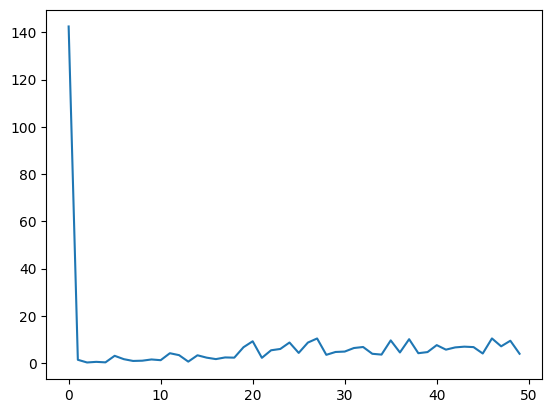

In [50]:
plt.plot(kurtosis_scores)

In [36]:
# Determine the number of components to use using the explained variance criterion
explained_variance = np.var(S_ica, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
# n_components = np.argmax(np.cumsum(explained_variance_ratio) >= 0.95) + 1
explained_variance.shape, explained_variance_ratio.shape, n_components

NameError: name 'S_ica' is not defined

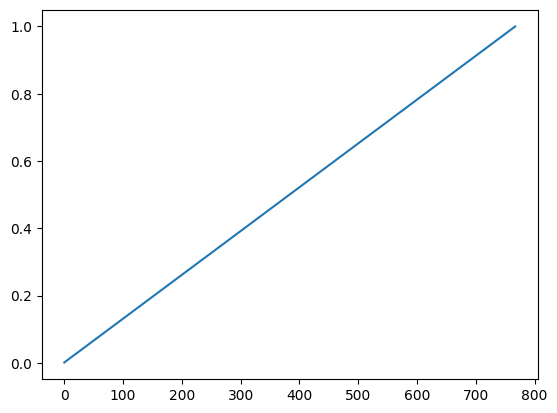

In [10]:
# plt.plot(explained_variance)
plt.plot(np.cumsum(explained_variance_ratio))

(50,) (50,) 50


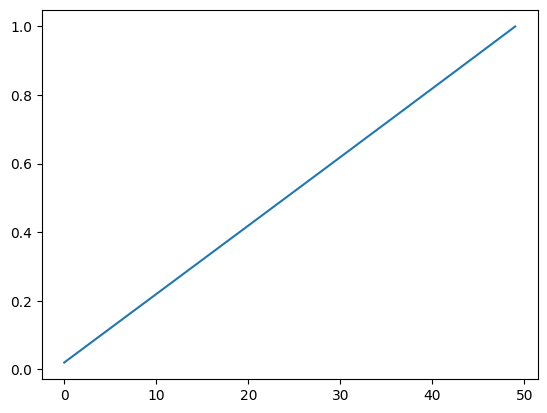

In [51]:
explained_variance = np.var(S_pca, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
# n_components = np.argmax(np.cumsum(explained_variance_ratio) >= 0.95) + 1
print(explained_variance.shape, explained_variance_ratio.shape, n_components)
plt.plot(np.cumsum(explained_variance_ratio))
# plt.plot(explained_variance_ratio)
# plt.plot(explained_variance)

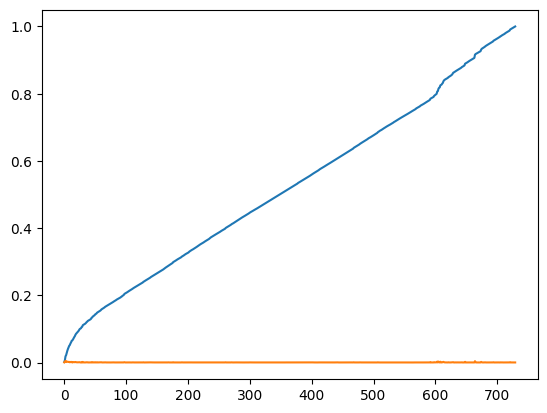

In [17]:
explained_variance = np.var(S_spca, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
n_components = np.argmax(np.cumsum(explained_variance_ratio) >= 0.95) + 1
explained_variance.shape, explained_variance_ratio.shape, n_components
plt.plot(np.cumsum(explained_variance_ratio))
plt.plot(explained_variance)